# Classifying spectra using a *Fully Connected Neural Network* (NN1)

1. **Defining the input parameters**
2. **Loading the training and testing data set**
3. **Set up the architecture for the neural network**
4. **Train the network** <br>
    4.1. **Plot of the loss and accuracy curve for NN1**
5. **Evaluate the result on the testing data set**

**Data:** 25th Nov. 2019 <br>
**Author**: Soumya Shreeram <br>
**Guidance from**: Schäfer Christoph E. Rerné<br>
**Script adapted from**: S. Ben Nejma

In [40]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
from sklearn.metrics import confusion_matrix
import pickle

To install **`tensorflow`** visit [here](https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/install.html) for instructions.

In [16]:
import tensorflow as tf
import keras
from keras.models import Sequential, load_model
from keras.layers import (Dense, Conv1D, MaxPooling1D,
                          Dropout, Flatten, BatchNormalization)
from keras import optimizers
from keras import regularizers

## 1. Defining the input parameters 

In [18]:
# code parameters used further
epochs = 20
batch_size = 30 
verbrose = 2    # degree of info. outputted during training
learning_rate=0.01

## 2. Loading the training and testing data sets

In [21]:
def loadTrainingTestingData(data_names):
    X_train = np.load("Data_files/"+data_names[0]+".npy", mmap_mode='r')
    Y_train = np.load("Data_files/"+data_names[1]+".npy", mmap_mode='r')
    X_test = np.load("Data_files/"+data_names[2]+".npy", mmap_mode='r')
    Y_test = np.load("Data_files/"+data_names[3]+".npy", mmap_mode='r')
    return X_train, Y_train, X_test, Y_test

In [35]:
# reading the data
data_names = ['X_train', 'Y_train', 'X_test', 'Y_test']

X_train, Y_train, X_test, Y_test = loadTrainingTestingData(data_names)
data_sets = [X_train, Y_train, X_test, Y_test]

# converts the vectors of intergers to a binary matrix
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

# print shape of training and testing data sets
for i in range(len(data_names)):
               print(data_names[i],'=', np.shape(data_sets[i]))

X_train = (7033, 4317)
Y_train = (7033,)
X_test = (3015, 4317)
Y_test = (3015,)


## 3. Setting up the architecture for the neural network

Training the data set implies that we are trying to optimize the loss function. 

* *Optimizer*: The optimizer chosen here is the Stochastic gradient descent optimizer (SGD); the list of other optimizers can be found [here](https://keras.io/optimizers/). 

* *Loss function*: Here, 'Cross entropy' is a method to define this loss function. 

In [19]:
model = Sequential()
# 1 input layer, 1 hidden layer, and 1 output layer
model.add(Dense(90, activation='relu', input_shape=(4317,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(3, activation='softmax'))

# optimizer 
sgd = optimizers.SGD(lr=learning_rate, momentum=0.0, nesterov=False)

# compilation for a multi-category classification problem
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

## 4. Train the network

The **`model.fit()`** fits the model to the data for the desired number of **`epochs`** (a pass through the entire training set), **`batch_size`** (number of training sample propogated at once through the network), and **`verbrose`** (degree of information printed out while training). 

In [37]:
model_history = model.fit(X_train, Y_train,
                                  epochs=epochs, batch_size=batch_size,
                                  validation_data=(X_test, Y_test),
                                  verbose=verbrose)

Instructions for updating:
Use tf.cast instead.
Train on 7033 samples, validate on 3015 samples
Epoch 1/20
 - 27s - loss: 0.7275 - acc: 0.8435 - val_loss: 0.5854 - val_acc: 0.8706
Epoch 2/20
 - 2s - loss: 0.5833 - acc: 0.8651 - val_loss: 0.4992 - val_acc: 0.8836
Epoch 3/20
 - 2s - loss: 0.4671 - acc: 0.8753 - val_loss: 0.8476 - val_acc: 0.7403
Epoch 4/20
 - 1s - loss: 0.5316 - acc: 0.8661 - val_loss: 0.6188 - val_acc: 0.7983
Epoch 5/20
 - 1s - loss: 0.4321 - acc: 0.8746 - val_loss: 0.4050 - val_acc: 0.8965
Epoch 6/20
 - 1s - loss: 0.4930 - acc: 0.8773 - val_loss: 0.3969 - val_acc: 0.8925
Epoch 7/20
 - 1s - loss: 0.4665 - acc: 0.8833 - val_loss: 0.4205 - val_acc: 0.8929
Epoch 8/20
 - 1s - loss: 0.4825 - acc: 0.8749 - val_loss: 0.4411 - val_acc: 0.8869
Epoch 9/20
 - 1s - loss: 0.5773 - acc: 0.8710 - val_loss: 3.9379 - val_acc: 0.6697
Epoch 10/20
 - 1s - loss: 0.4634 - acc: 0.8787 - val_loss: 0.4121 - val_acc: 0.8988
Epoch 11/20
 - 1s - loss: 0.3578 - acc: 0.8969 - val_loss: 0.4316 - val_

### 4.1 Plot of the loss and accuracy curve for NN1

In [71]:
def setLabels(ax, xlabel, ylabel, ticks):
    """
    Function sets the axes labels, legent size, and ticks
    """
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)
    ax.legend(loc='center right', fontsize=18)
    ax.grid()
    if ticks:
        ax.tick_params(which='both', labelsize=18)
    return

def plotLoss(ax, loss_Accuracy, labels):
    """
    Function plots the loss curve for training run of x epochs
    """
    ax.plot(history[loss_Accuracy[0]], 'r', lw=2, label=labels[0])
    ax.plot(history[loss_Accuracy[1]], 'b', lw=2, label=labels[1])
    ax.set_title('Loss curve for NN1\n')
    setLabels(ax, 'Epoch', r'$\mathcal{L}\ \equiv$ Categorical cross entropy', ticks=True)
    return

def plotAccuracy(ax, loss_Accuracy, labels):
    """
    Function plots the accuracy curve for training run of x epochs
    """
    ax.plot(history[loss_Accuracy[2]],  'r', lw=2, label=labels[0])
    ax.plot(history[loss_Accuracy[3]], 'b', lw=2, label=labels[1])
    ax.set_title('Accuracy curve for NN1\n')
    setLabels(ax, 'Epoch', 'Accuracy (%)', ticks=True)
    return

The loss and accuracy curves are plotted for NN1 for 20 epochs. 

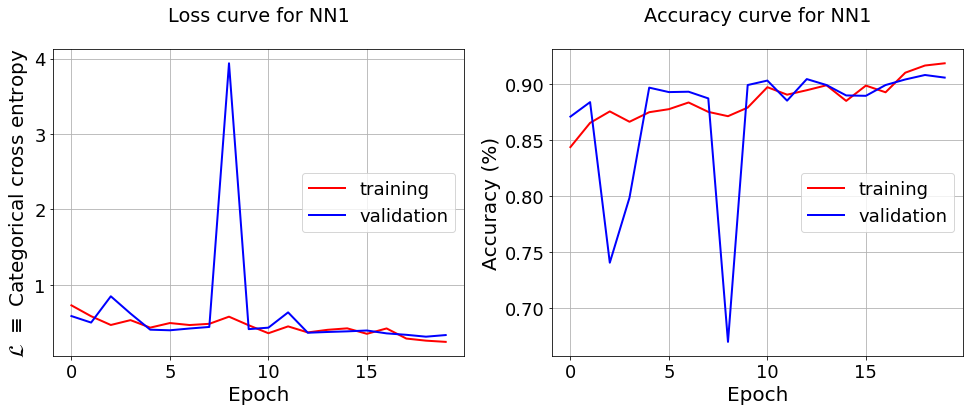

In [70]:
# logs the history of the run
history = model_history.history

# plots the history
fig, ax = plt.subplots(1,2, figsize=(14,6))
labels = ['training', 'validation']
loss_Accuracy = ['loss', 'val_loss', 'acc', 'val_acc']

plotLoss(ax[0], loss_Accuracy, labels)
plotAccuracy(ax[1], loss_Accuracy, labels)
 
fig.tight_layout()

## 5. Evaluate the result on the testing data set

Once we have trained the model to make predictions on the data, we evaluate it's performance on the test data set.

In [92]:
def saveModel(history):
    """
    Function to save the model and it's history
    """
    path = 'Algos/NN_folder/NN1'
    model.save(path+'.h5')
    
    with open(path+'_history.pkl', 'wb') as filehandler:
        pickle.dump(history, filehandler)
    print('\nModel saved')
    return

In [95]:
# predictions made on the test data set, computes the confusion matrix

score = model.evaluate(X_test, Y_test,verbose=0)
print('\nLoss = %.2f percent, Accuracy = %.2f percent'%(score[0]*100, score[1]*100))

saveModel(history)


Loss = 33.35 percent, Accuracy = 90.55 percent

Model saved
